#Sentiment Analysis I 

##Table of contents:
* Example: Twitter Analysis during the Russian-Ukraine Crisis
  * Data Preprocessing
  * EDA 
  * Feature Extraction 
  * ML Model Predictions
  * Evaluation

##Explanation on what we are looking out for:
* What are we trying to tackle? 
  *  Indulge in such a topic where we analyse the emotions of the general public as tensions
continued to arise between Russian and Ukraine supporters. Therefore, we are doing sentiment analysis on
the Ukraine-Russia War on Twitter.
* Objectives:
  * Identify the mental state of the general public based on the comments extracted from the tweets on Twitter
  * Understand how this conflict has affected the general public using sentiment analysis
  * Data Source: https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated
* Evaluation Method
  * Logistic Regression 
    * Divide the training set into the relative emotions expressed in the tweets. Then, it counts all the words and makes a python dictionary of their frequencies of the positive and negative emotions.
  * Decision Tree Classifier
    * Supervised learning approach used in data mining
    * Used as a predictive model to draw conclusions based on a set of observations

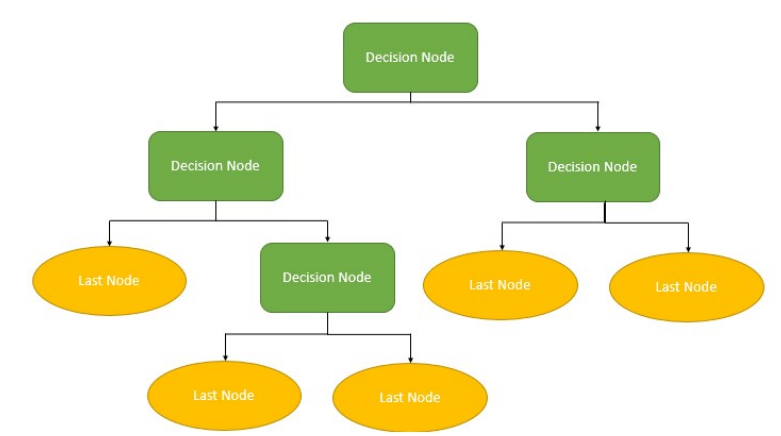

* Evaluation metrics
  * Precision 
  * Recall 
  * F-score 
  * Accuracy is an evaluation metric that allows you to measure the total number of predictions a model gets right 

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# For dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing all nltk (natural language Toolkit) related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

#To get subjectivity and polarity, import textblob
from textblob import TextBlob

# importing Regular Expressions
import re
import string

# Bag of Words representation
from sklearn.feature_extraction.text import CountVectorizer

#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Logistic Regression
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedShuffleSplit
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Grid Search
from sklearn.model_selection import GridSearchCV

#LinearSVC
from sklearn.svm import LinearSVC

#SGD classifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#To ignore warning
import warnings
warnings.filterwarnings("ignore")

#Emotion
!pip install nrclex
from nrclex import NRCLex

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Inspect and explore data

In [3]:
data_sentiment = pd.read_csv('/content/drive/My Drive/ukrainerussian_csv.csv')

In [4]:
data_sentiment.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1590510105598259201,1590510105598259201,2022-11-10 01:02:14 UTC,2022-11-10,01:02:14,0,1162601483856039936,sumanth09315243,WAGMIFestival.eth,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1590510093610909698,1589760170938470400,2022-11-10 01:02:11 UTC,2022-11-10,01:02:11,0,1085482994176012288,liberalismisco1,Liberalism is Cool,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bjovan3', 'name': '🇷🇸 مها', ...",NaN,NaN,NaN,NaN
2,1590510091157274624,1590035806433210368,2022-11-10 01:02:10 UTC,2022-11-10,01:02:10,0,19697793,crypto_knight_3,Big Phil 🍥,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Trollstoy88', 'name': 'Troll...",NaN,NaN,NaN,NaN
3,1590510084802883584,1590510084802883584,2022-11-10 01:02:09 UTC,2022-11-10,01:02:09,0,3627349575,engineer_psych,Dark6Light,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1590510082969989120,1590508019862843392,2022-11-10 01:02:08 UTC,2022-11-10,01:02:08,0,1541625790634270720,deonrichar1,The In Your Face Show W/Dion DB😅🤗🇺🇸⚖️🕙🙏✨,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'hrkbenowen', 'name': 'Ben Ow...",NaN,NaN,NaN,NaN


In [5]:
# Retrieve all the columns within the dataframe
data_sentiment.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
# View the types of data collected in each column of the data frame
data_sentiment.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [7]:
#Extract tweet column which required for sentiment analysis
data_sentiment['tweet']

0        @jensstoltenberg Nato/otan is the most terrori...
1        @bjovan3 @KimDotcom You’re talking as if it wa...
2        @Trollstoy88 Bet russia wishes it hadnt wasted...
3        On the last meeting Lukashenko and Putin talki...
4        @hrkbenowen Why wouldn't he be? Russia (not th...
                               ...                        
10004    Ukraine has won the war. Russia is leaving Ukr...
10005    Biden says it remains to be seen if the Kherso...
10006    Talks with Russia? No way, say Ukrainians | Ru...
10007    @DylanBurns1776 Supporting kurds to sow divisi...
10008    @Breaking911 I voted for him last time, can’t ...
Name: tweet, Length: 10009, dtype: object

In [8]:
# Extracting columns required to perform sentiment anlaysis
unprocessed_tweet_data = pd.DataFrame({'Tweet':pd.Series(data_sentiment['tweet']),'Language tweet was in': pd.Series(data_sentiment['language'])})

In [9]:
unprocessed_tweet_data.head()

,Tweet,Language tweet was in
0,@jensstoltenberg Nato/otan is the most terrori...,en
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en
3,On the last meeting Lukashenko and Putin talki...,en
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en


In [10]:
# Checking for null values
unprocessed_tweet_data.isnull().sum()

Tweet                    0
Language tweet was in    0
dtype: int64

##EDA 

### Plot a bar graph to show the distribution of the top 5 langugages reflected in the twitter dataset 

In [11]:
# Printing out unique row data in the language column
print(unprocessed_tweet_data['Language tweet was in'].unique())

['en' 'qme' 'pt' 'nl' 'it' 'ca' 'in' 'und' 'ta' 'ja' 'fr' 'zh' 'vi' 'ro'
 'th' 'de' 'ht' 'es' 'qht' 'ur' 'ru' 'fi' 'ar' 'cs' 'pl' 'hi' 'tl' 'tr'
 'no' 'et' 'uk' 'el' 'da' 'qam' 'iw' 'sv' 'lt' 'bg']


In [12]:
# Counting the number of each language type using value_count() function
unprocessed_tweet_data['Language tweet was in'].value_counts()

en     8793
pt      343
it      232
qme     138
und      80
in       54
th       53
es       38
vi       37
ru       36
ca       34
de       27
ja       26
fr       25
nl       13
ar       11
qht       9
fi        8
pl        6
ro        5
zh        5
et        4
cs        4
uk        4
hi        4
tl        4
no        2
ht        2
tr        2
qam       2
lt        1
sv        1
iw        1
ur        1
da        1
el        1
ta        1
bg        1
Name: Language tweet was in, dtype: int64

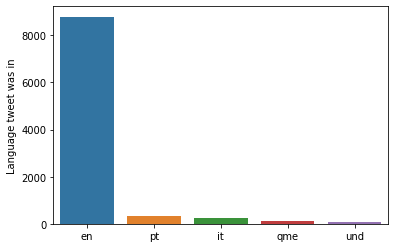

In [13]:
# Plotting the bar plot 

sns.barplot(x= unprocessed_tweet_data['Language tweet was in'].value_counts()[:5].index, y=unprocessed_tweet_data['Language tweet was in'].value_counts()[:5])

##Data Cleaning

In [14]:
unprocessed_tweet_data_en = unprocessed_tweet_data[unprocessed_tweet_data['Language tweet was in']=='en']

In [15]:
unprocessed_tweet_data_en

,Tweet,Language tweet was in
0,@jensstoltenberg Nato/otan is the most terrori...,en
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en
3,On the last meeting Lukashenko and Putin talki...,en
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en
...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en
10005,Biden says it remains to be seen if the Kherso...,en
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en


In [16]:
# Setting lemmatizer variable 
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [17]:
# Example of list of stopwords stored in NLTK
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# Processing Tweet data
def tweet_processor(tweet_data):
  #Changing all tweet texts to be lowercase
  tweet_data = str(tweet_data).lower()

  #Removing punctuation
  tweet_data = re.sub('\[.*?\]', '', tweet_data)
  
  #Removing random standalone alphabets 
  tweet_data = re.sub("[^a-z\s]", "", tweet_data)

  #Removing hashtags
  tweet_data = re.sub("#", " ", tweet_data)

  #Removing RT 
  tweet_data = re.sub("RT[\s]+", "", tweet_data)

  #Removing hyperlinks
  tweet_data = re.sub('https?://\S+|www\.\S+', '', tweet_data)

  tweet_data = re.sub('<.*?>+', '', tweet_data)

  tweet_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweet_data)

  #Removing lines separated by \n
  tweet_data = re.sub('\n', '', tweet_data)

  tweet_data = re.sub('\w*\d\w*', '', tweet_data)
  #second code satisfy those conditions that weren't covered in the first line of code (Above)

  #Removing stopwords
  tweet_data = [word for word in tweet_data.split(' ') if word not in stopword]
  tweet_data =" ".join(tweet_data)

  #Lemmatize 
  tweet_data = [lemmatizer.lemmatize(word) for word in tweet_data.split(' ')]
  tweet_data=" ".join(tweet_data)

  return tweet_data

In [19]:
#Create a new variable for our processed tweets
processed_tweet_data = unprocessed_tweet_data_en

In [20]:
#Apply the tweet_processer function 
processed_tweet_data['Reviewed_tweet'] = unprocessed_tweet_data_en['Tweet'].apply(tweet_processor)

In [21]:
processed_tweet_data

,Tweet,Language tweet was in,Reviewed_tweet
0,@jensstoltenberg Nato/otan is the most terrori...,en,jensstoltenberg natootan terrorist organizatio...
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,bjovan kimdotcom youre talking ukraine invaded...
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,trollstoy bet russia wish hadnt wasted syria
3,On the last meeting Lukashenko and Putin talki...,en,last meeting lukashenko putin talking respect ...
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,hrkbenowen wouldnt russia im putinpuppet aint ...
...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,ukraine war russia leaving ukraine heavy loss ...
10005,Biden says it remains to be seen if the Kherso...,en,biden say remains seen kherson withdrawal lead...
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,talk russia way say ukrainian russiaukraine w...
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,dylanburns supporting kurd sow division iran s...


## Computing Polarity and subjectivity

In [22]:
#Subjectivity of the processed data
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [23]:
#Polarity of the processed data
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [24]:
#Creating columns to display subjectivity and polarity
processed_tweet_data['Subjectivity'] = processed_tweet_data['Reviewed_tweet'].apply(getSubjectivity)
processed_tweet_data['Polarity'] = processed_tweet_data['Reviewed_tweet'].apply(getPolarity)

In [25]:
processed_tweet_data

,Tweet,Language tweet was in,Reviewed_tweet,Subjectivity,Polarity
0,@jensstoltenberg Nato/otan is the most terrori...,en,jensstoltenberg natootan terrorist organizatio...,0.227273,0.068182
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,bjovan kimdotcom youre talking ukraine invaded...,0.644444,0.100000
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,trollstoy bet russia wish hadnt wasted syria,0.000000,-0.200000
3,On the last meeting Lukashenko and Putin talki...,en,last meeting lukashenko putin talking respect ...,0.066667,0.000000
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,hrkbenowen wouldnt russia im putinpuppet aint ...,0.000000,0.000000
...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,ukraine war russia leaving ukraine heavy loss ...,0.500000,-0.200000
10005,Biden says it remains to be seen if the Kherso...,en,biden say remains seen kherson withdrawal lead...,0.750000,0.250000
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,talk russia way say ukrainian russiaukraine w...,0.000000,0.000000
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,dylanburns supporting kurd sow division iran s...,0.375000,0.375000


In [26]:
#Computing Computation Analysis base on Polarity

def getCoputation(score):
  if score < -0.5:
    return 'Very Negative'
  if score < 0: 
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
    return 'Positive'

processed_tweet_data['Computation_Analysis'] = processed_tweet_data['Polarity'].apply(getCoputation)
    

In [27]:
processed_tweet_data

,Tweet,Language tweet was in,Reviewed_tweet,Subjectivity,Polarity,Computation_Analysis
0,@jensstoltenberg Nato/otan is the most terrori...,en,jensstoltenberg natootan terrorist organizatio...,0.227273,0.068182,Positive
1,@bjovan3 @KimDotcom You’re talking as if it wa...,en,bjovan kimdotcom youre talking ukraine invaded...,0.644444,0.100000,Positive
2,@Trollstoy88 Bet russia wishes it hadnt wasted...,en,trollstoy bet russia wish hadnt wasted syria,0.000000,-0.200000,Negative
3,On the last meeting Lukashenko and Putin talki...,en,last meeting lukashenko putin talking respect ...,0.066667,0.000000,Neutral
4,@hrkbenowen Why wouldn't he be? Russia (not th...,en,hrkbenowen wouldnt russia im putinpuppet aint ...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukr...,en,ukraine war russia leaving ukraine heavy loss ...,0.500000,-0.200000,Negative
10005,Biden says it remains to be seen if the Kherso...,en,biden say remains seen kherson withdrawal lead...,0.750000,0.250000,Positive
10006,"Talks with Russia? No way, say Ukrainians | Ru...",en,talk russia way say ukrainian russiaukraine w...,0.000000,0.000000,Neutral
10007,@DylanBurns1776 Supporting kurds to sow divisi...,en,dylanburns supporting kurd sow division iran s...,0.375000,0.375000,Positive


In [28]:
processed_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 10008
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tweet                  8793 non-null   object 
 1   Language tweet was in  8793 non-null   object 
 2   Reviewed_tweet         8793 non-null   object 
 3   Subjectivity           8793 non-null   float64
 4   Polarity               8793 non-null   float64
 5   Computation_Analysis   8793 non-null   object 
dtypes: float64(2), object(4)
memory usage: 480.9+ KB


##Plotting polarity and subjectivity

In [29]:
#Creating a new dataframe sort by polarity
sort_data = processed_tweet_data.sort_values(by=['Polarity'])
sort_data

,Tweet,Language tweet was in,Reviewed_tweet,Subjectivity,Polarity,Computation_Analysis
2750,Terrible Russia. Help pay off the #loan. http...,en,terrible russia help pay loan httpstcoqxrvtnbm,1.0,-1.0,Very Negative
4447,With all these talks that Ukraine should start...,en,talk ukraine start negotiating russia appeas...,1.0,-1.0,Very Negative
5750,@RWFANATIC1337 @ArthurPickss @ScottMGreer It's...,en,rwfanatic arthurpickss scottmgreer nato though...,1.0,-1.0,Very Negative
8740,"Potter is a terrible mistake, nah Russia cause...",en,potter terrible mistake nah russia cause nonse...,1.0,-1.0,Very Negative
3475,@AndrewYang The Borscht whisperer here. Russi...,en,andrewyang borscht whisperer russia listenin ...,1.0,-1.0,Very Negative
...,...,...,...,...,...,...
6928,"@MsGreatApe @UN @giladerdan1 Hmmm, which is th...",en,msgreatape un giladerdan hmmm greatest threat ...,1.0,1.0,Positive
1129,7 Best #YouTube Advertising Agenci̗es 🌟 👉 htt...,en,best youtube advertising agency httpstcoht...,0.3,1.0,Positive
7353,"@Pontifex Go on your Popeness, do your best - ...",en,pontifex go popeness best say russia see mana...,0.3,1.0,Positive
5985,@acteduweininger The tooth to tail ratio for R...,en,acteduweininger tooth tail ratio russia best ...,0.3,1.0,Positive


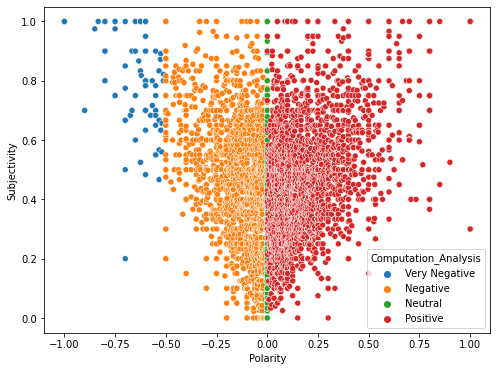

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Polarity', y='Subjectivity', hue ='Computation_Analysis', data = sort_data)
plt.show()

## Computing percentage of positive,neutral and negative tweets

In [31]:
#Percentage of positive tweets
posTweets = sort_data[sort_data.Computation_Analysis=='Positive']
posTweets = posTweets['Reviewed_tweet']
round((posTweets.shape[0]/sort_data.shape[0]*100),1)

40.3

In [32]:
#Percentage of negative tweets
negTweets = sort_data[sort_data.Computation_Analysis=='Negative']
negTweets = negTweets['Reviewed_tweet']
round((negTweets.shape[0]/sort_data.shape[0]*100),1)

23.3

In [33]:
#Percentage of neutral tweets
neuTweets = sort_data[sort_data.Computation_Analysis=='Neutral']
neuTweets = neuTweets['Reviewed_tweet']
round((posTweets.shape[0]/sort_data.shape[0]*100),1)

40.3

In [34]:
#Percentage of very negative tweets
vnegTweets = sort_data[sort_data.Computation_Analysis=='Very Negative']
vnegTweets = vnegTweets['Reviewed_tweet']
round((vnegTweets.shape[0]/sort_data.shape[0]*100),1)

2.0

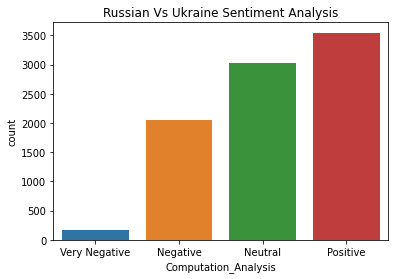

In [35]:
#Count plot of Computation Analysis 
sort_data['Computation_Analysis'].value_counts()
plt.title('Russian Vs Ukraine Sentiment Analysis')
sns.countplot(x='Computation_Analysis',data = sort_data)

Text(0.5, 1.0, 'Russian VS Ukraine Sentiment Analysis')

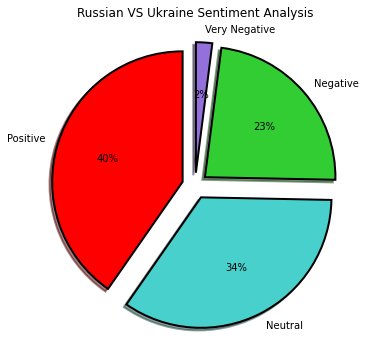

In [36]:
#Piechart Visualisation
fig = plt.figure(figsize=(6,6))
colors = {'mediumturquoise', 'limegreen', 'mediumpurple', 'red'}
wedgeProps = {'linewidth':2, 'edgecolor':'black'}
tags = sort_data['Computation_Analysis'].value_counts()
explode=(0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.0f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wedgeProps, explode = explode, label='')
plt.title('Russian VS Ukraine Sentiment Analysis')

##Word Cloud

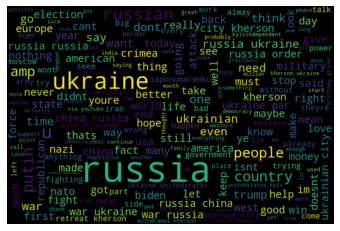

In [37]:
# Create and generate a word cloud image: 
allTweets = ' '.join([tweets for tweets in processed_tweet_data['Reviewed_tweet']])
RU_wordcloud=WordCloud(width=900, height=600, random_state = 21, max_font_size=100).generate(allTweets) 

#Display the generated image: 
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


## Emotion Detection

In [38]:
#Using a python library to determine the extent of the person's emotions(e.g. fear, anger, anticipation, ...)
sort_data['emotions'] = sort_data['Reviewed_tweet'].apply(lambda x: NRCLex(x).affect_frequencies)
sort_data.tail(15)
#.affect_frequencies returns the frequency of each emotions

,Tweet,Language tweet was in,Reviewed_tweet,Subjectivity,Polarity,Computation_Analysis,emotions
8081,@Cope_C_Wanklord @mfa_russia @RussiaUN @missio...,en,copecwanklord mfarussia russiaun missionrussia...,1.0,1.0,Positive,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3054,@Navsteva Once the Ukrainian forces move and t...,en,navsteva ukrainian force move take control khe...,0.3,1.0,Positive,"{'fear': 0.29411764705882354, 'anger': 0.11764..."
6352,Russia at its best will lead the world to peac...,en,russia best lead world peace amp prosperity e...,0.3,1.0,Positive,"{'fear': 0.0, 'anger': 0.08333333333333333, 'a..."
1437,"1978 World Cup in Argentina, 2018 World Cup in...",en,world cup argentina world cup russia world ...,0.3,1.0,Positive,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2073,@JasonRo18823345 @FoxNews No! Russia does what...,en,jasonro foxnews russia whats russia best inter...,0.3,1.0,Positive,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
8744,Russia is losing best offer Russia will get,en,russia losing best offer russia get,0.3,1.0,Positive,"{'fear': 0.0, 'anger': 0.25, 'anticip': 0.0, '..."
7293,@Wizarab10 The best still remains Zenit from R...,en,wizarab best still remains zenit russia,0.3,1.0,Positive,"{'fear': 0.2, 'anger': 0.0, 'anticip': 0.0, 't..."
8348,@CatDavid69 @_Six8thegreat Cuba are russias be...,en,catdavid sixthegreat cuba russia best ally sup...,0.3,1.0,Positive,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
5699,@JebraFaushay If we can get these two perfect ...,en,jebrafaushay get two perfect specimen oval off...,1.0,1.0,Positive,"{'fear': 0.09090909090909091, 'anger': 0.09090..."
8328,@aripari18 @Lizpowe08720708 @Alloftheloot @ars...,en,aripari lizpowe alloftheloot arseneozeruga tin...,1.0,1.0,Positive,"{'fear': 0.05555555555555555, 'anger': 0.11111..."


In [39]:
sort_data = pd.concat([sort_data.drop(['emotions'],axis=1), sort_data['emotions'].apply(pd.Series)],axis=1)

In [40]:
sort_data.head(5)

,Tweet,Language tweet was in,Reviewed_tweet,Subjectivity,Polarity,Computation_Analysis,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
2750,Terrible Russia. Help pay off the #loan. http...,en,terrible russia help pay loan httpstcoqxrvtnbm,1.0,-1.0,Very Negative,0.111111,0.111111,0.0,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
4447,With all these talks that Ukraine should start...,en,talk ukraine start negotiating russia appeas...,1.0,-1.0,Very Negative,0.176471,0.176471,0.0,0.000000,0.058824,0.058824,0.176471,0.117647,0.176471,0.000000,0.058824
5750,@RWFANATIC1337 @ArthurPickss @ScottMGreer It's...,en,rwfanatic arthurpickss scottmgreer nato though...,1.0,-1.0,Very Negative,0.111111,0.222222,0.0,0.000000,0.000000,0.111111,0.222222,0.111111,0.222222,0.000000,NaN
8740,"Potter is a terrible mistake, nah Russia cause...",en,potter terrible mistake nah russia cause nonse...,1.0,-1.0,Very Negative,0.125000,0.125000,0.0,0.000000,0.000000,0.000000,0.375000,0.250000,0.125000,0.000000,NaN
3475,@AndrewYang The Borscht whisperer here. Russi...,en,andrewyang borscht whisperer russia listenin ...,1.0,-1.0,Very Negative,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,NaN


###Data Cleaning for new rows added

In [41]:
#check for null values
sort_data.isnull().sum()

Tweet                       0
Language tweet was in       0
Reviewed_tweet              0
Subjectivity                0
Polarity                    0
Computation_Analysis        0
fear                        0
anger                       0
anticip                     0
trust                       0
surprise                    0
positive                    0
negative                    0
sadness                     0
disgust                     0
joy                         0
anticipation             5147
dtype: int64

In [42]:
#Dropping irrelevant columns (anticip)
sort_data.drop('anticip',axis=1,inplace =True)

In [43]:
#Check if Anticip still there
sort_data.columns

Index(['Tweet', 'Language tweet was in', 'Reviewed_tweet', 'Subjectivity',
       'Polarity', 'Computation_Analysis', 'fear', 'anger', 'trust',
       'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy',
       'anticipation'],
      dtype='object')

In [44]:
#Remove null values
sort_data['anticipation']= sort_data['anticipation'].fillna(0)

In [45]:
sort_data.isnull().sum()

Tweet                    0
Language tweet was in    0
Reviewed_tweet           0
Subjectivity             0
Polarity                 0
Computation_Analysis     0
fear                     0
anger                    0
trust                    0
surprise                 0
positive                 0
negative                 0
sadness                  0
disgust                  0
joy                      0
anticipation             0
dtype: int64

In [46]:
sort_data.head()

,Tweet,Language tweet was in,Reviewed_tweet,Subjectivity,Polarity,Computation_Analysis,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
2750,Terrible Russia. Help pay off the #loan. http...,en,terrible russia help pay loan httpstcoqxrvtnbm,1.0,-1.0,Very Negative,0.111111,0.111111,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111
4447,With all these talks that Ukraine should start...,en,talk ukraine start negotiating russia appeas...,1.0,-1.0,Very Negative,0.176471,0.176471,0.000000,0.058824,0.058824,0.176471,0.117647,0.176471,0.000000,0.058824
5750,@RWFANATIC1337 @ArthurPickss @ScottMGreer It's...,en,rwfanatic arthurpickss scottmgreer nato though...,1.0,-1.0,Very Negative,0.111111,0.222222,0.000000,0.000000,0.111111,0.222222,0.111111,0.222222,0.000000,0.000000
8740,"Potter is a terrible mistake, nah Russia cause...",en,potter terrible mistake nah russia cause nonse...,1.0,-1.0,Very Negative,0.125000,0.125000,0.000000,0.000000,0.000000,0.375000,0.250000,0.125000,0.000000,0.000000
3475,@AndrewYang The Borscht whisperer here. Russi...,en,andrewyang borscht whisperer russia listenin ...,1.0,-1.0,Very Negative,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000


### Measuring the correlation between the features (Extra part added not from Thurs session)

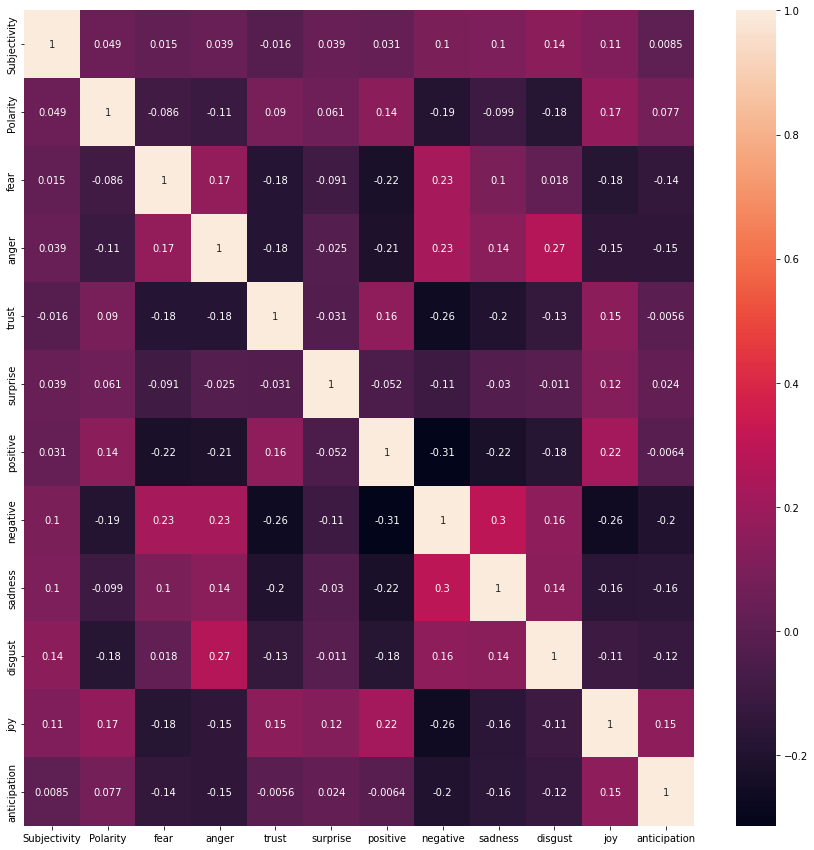

In [47]:
corr_matrix = sort_data.corr()
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## ML model predictions



### Logistic Regression

#### Vectorising Training Dataset

In [48]:
vect = CountVectorizer(ngram_range=(1,2)).fit(sort_data['Reviewed_tweet'])

####Feature Engineering

In [49]:
#Getting the feature names from the vectorised features
feature_names = vect.get_feature_names()

In [50]:
feature_names

['aaaah',
 'aaaah thats',
 'aalleexx',
 'aalleexx virgilvvd',
 'aaronjmate',
 'aaronjmate bmarchetich',
 'aaronjmate cirincione',
 'aaronjmate revisit',
 'aaronjmate shill',
 'aaronsp',
 'aaronsp longhairleeroy',
 'aavs',
 'aavs ukraine',
 'abaerbock',
 'abaerbock putin',
 'abandon',
 'abandon city',
 'abandon equipment',
 'abandon key',
 'abandon kherson',
 'abandon major',
 'abandon people',
 'abandon rest',
 'abandon ukraine',
 'abandon ukrainian',
 'abandoned',
 'abandoned account',
 'abandoned beach',
 'abandoned command',
 'abandoned fact',
 'abandoned keyatone',
 'abandoned kherson',
 'abandoned people',
 'abandoned russia',
 'abandoned russian',
 'abandoned ten',
 'abandoning',
 'abandoning city',
 'abandoning communism',
 'abandoning defense',
 'abandoning key',
 'abandoning kherson',
 'abandoning local',
 'abandoning place',
 'abandoning ukrainian',
 'abandonment',
 'abandonment kherson',
 'abandonned',
 'abandonned fleeing',
 'abbott',
 'abbott surprise',
 'abbreviation',
 '

In [51]:
#Extract feature
features = sort_data['Reviewed_tweet']

In [52]:
#Extract targets
targets = sort_data['Computation_Analysis']

In [53]:
#Transform feature data - Encode
x = vect.transform(features)

In [54]:
#Split arrays or matricxes into random train and test subsets. In this case, 80:20 (Train:Test) ratio
x_train, x_test, y_train, y_test = train_test_split(x, targets, test_size=0.2, random_state=42)

####Training model

In [55]:
#Setting model
lr = LogisticRegression()

In [56]:
#Fitting features and target to the model 
lr.fit(x_train, y_train)

LogisticRegression()

In [60]:
#Finding Accuracy of data
lr_y_pred = lr.predict(x_test)
lr_acc = accuracy_score(lr_y_pred, y_test)
print('Test accuracy: {:.2f}%'.format(lr_acc*100))

Test accuracy: 75.21%


##### Printing the classification report based on performance of model 

In [61]:
print(confusion_matrix(y_test, lr_y_pred))
print("\n")
print(classification_report(y_test, lr_y_pred))
#copy the code cell by 21:05

[[234  91  95   1]
 [ 16 512  39   0]
 [ 44 113 575   0]
 [ 11  21   5   2]]


               precision    recall  f1-score   support

     Negative       0.77      0.56      0.64       421
      Neutral       0.69      0.90      0.79       567
     Positive       0.81      0.79      0.80       732
Very Negative       0.67      0.05      0.10        39

     accuracy                           0.75      1759
    macro avg       0.73      0.57      0.58      1759
 weighted avg       0.76      0.75      0.74      1759



##### Data Visualisation

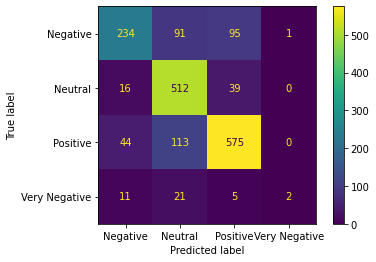

In [62]:
cm = confusion_matrix(y_test, lr_y_pred, labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

##### Hyper parameter tuning

In [63]:
param_grid={'C':[0.001, 0.01, 0.1, 1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [64]:
#Find the best parameters
print('Best parameter:', grid.best_params_)

Best parameter: {'C': 10}


In [65]:
#Predicting target based on test feature
y_pred = grid.predict(x_test)

In [66]:
#Calculating Accuracy
lr_tuned_acc = accuracy_score(y_pred, y_test)
print('Test accuracy: {:.2f}%'.format(lr_tuned_acc*100))

Test accuracy: 76.18%


In [67]:
#Confusion matrix + classification report
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[242  88  89   2]
 [ 15 516  36   0]
 [ 43 112 577   0]
 [  9  21   4   5]]


               precision    recall  f1-score   support

     Negative       0.78      0.57      0.66       421
      Neutral       0.70      0.91      0.79       567
     Positive       0.82      0.79      0.80       732
Very Negative       0.71      0.13      0.22        39

     accuracy                           0.76      1759
    macro avg       0.75      0.60      0.62      1759
 weighted avg       0.77      0.76      0.75      1759



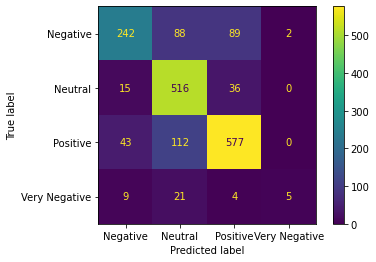

In [68]:
cm_tuned = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=lr.classes_)
disp.plot()

###Model 2: Decision Tree Classifier

In [69]:
#Initialise the classifier
dt = DecisionTreeClassifier()

In [70]:
#Training the model
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [71]:
#Perform prediction
dt_pred = dt.predict(x_test)
#Calculate Accuracy
dt_acc = accuracy_score(dt_pred, y_test)
print("Test accuracy: {:.2f}%".format(dt_acc*100))

Test accuracy: 80.39%


| Logistic Regression | Decision Tree |
| :-----------: | :-----------: | 
| 76.18% | 80.39% |